# Import and initial setup

In [364]:
# Import Necessary Libaraies
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initial configuration
raw_data_path = './Data/apartments_for_rent_classified_100K.csv'
sns.set_style('darkgrid')

In [365]:
# Determine what encoding has been used
with open(raw_data_path, 'rb') as file:
    result = chardet.detect(file.read(100000))
    file_encoding = result['encoding']
file_encoding

'Windows-1252'

In [366]:
# Import Data
raw_data = pd.read_csv(raw_data_path, encoding=file_encoding, sep=';', low_memory=False)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

In [367]:
raw_data

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,5121219946,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,USD,No,Yes,...,$780,Monthly,605,NaN,Houston,TX,29.6151,-95.1998,RentDigs.com,1544185770
99488,5121219696,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,USD,No,Yes,...,$813,Monthly,921,NaN,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1544185750
99489,5121219420,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,...,"$1,325",Monthly,650,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1544185729
99490,5121218935,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,USD,No,Yes,...,$931,Monthly,701,NaN,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1544185670


# Initial Data Cleaning

## Looking for missing values

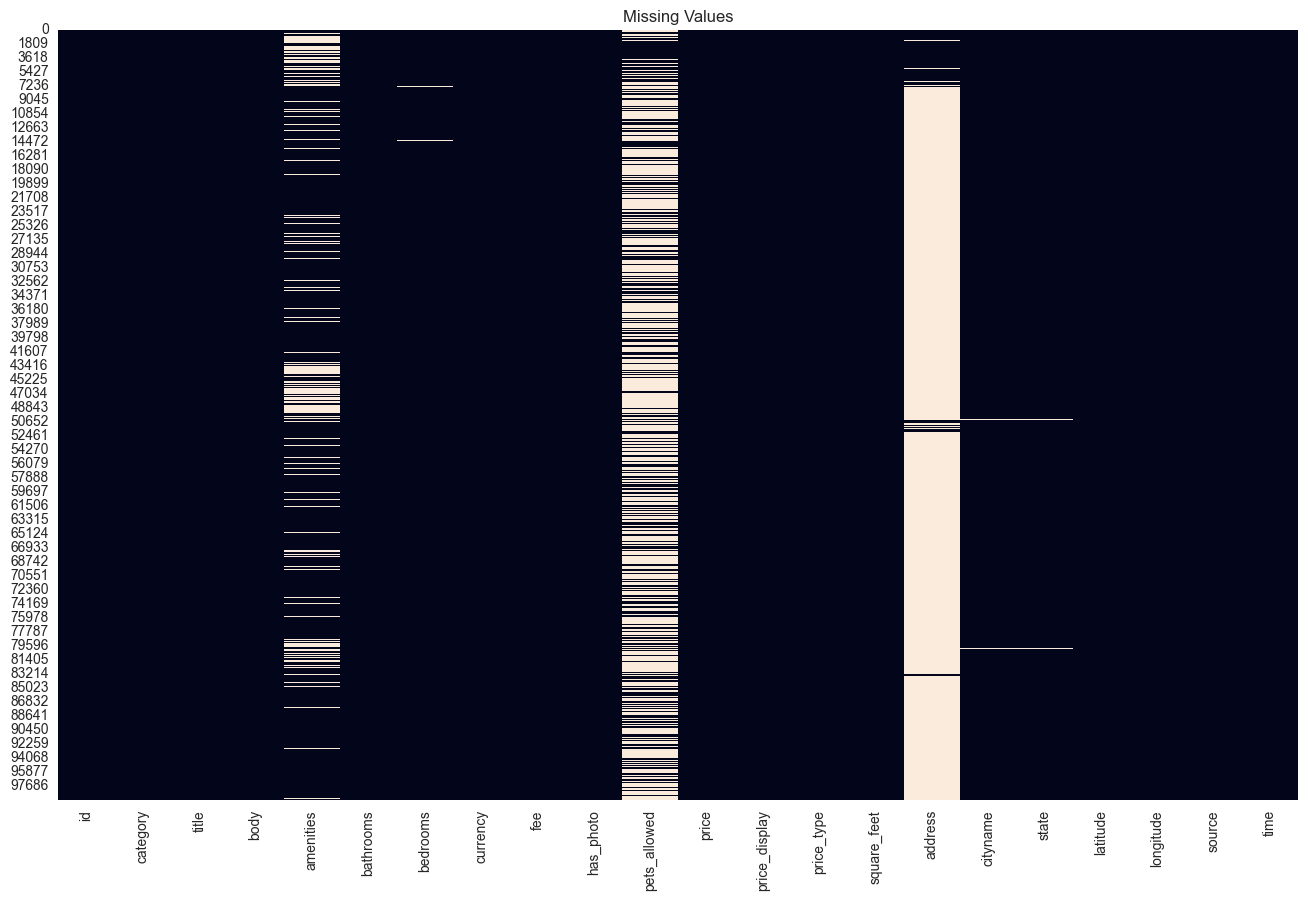

In [368]:
plt.figure(figsize=(16,10))
sns.heatmap(raw_data.isnull(), cbar=False)
plt.title('Missing Values')
plt.show()

Ved at se på grafen her over kan man konkludere at det ikke vil være gavnligt medtage kolonnen 'address' grundet den store mængde manglende data.
Der opstår her et problem i kolonnen 'pets_allowed' samt 'amenities' da Pandas biblioteket læser værdien 'None','null' og 'NaN', jeg tolker disse som ingen dyr tilladt og ingen amenities.

In [369]:
print(f"Procentage of rows lacking the amenities value:  {(len(raw_data.loc[raw_data['amenities'].isnull()])/len(raw_data))*100}")
print(f"Procentage of rows lacking the pets_allowed value:  {(len(raw_data.loc[raw_data['pets_allowed'].isnull()])/len(raw_data))*100}")
print(f"Procentage of rows lacking the address value:  {(len(raw_data.loc[raw_data['address'].isnull()])/len(raw_data))*100}")

Procentage of rows lacking the amenities value:  16.125919671933424
Procentage of rows lacking the pets_allowed value:  60.73252120773529
Procentage of rows lacking the address value:  92.01644353314839


In [370]:
# Remove columns with alot of missing values
data = raw_data.drop(['address'], axis=1, inplace=False)

Looking for missing values in bedrooms, bathrooms and price

In [371]:
data.isna().sum()

id                   0
category             0
title                0
body                 0
amenities        16044
bathrooms           63
bedrooms           124
currency             0
fee                  0
has_photo            0
pets_allowed     60424
price                1
price_display        1
price_type           0
square_feet          0
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64

In [372]:
data.dropna(subset=['bedrooms', 'bathrooms', 'price'], inplace=True)
data.isna().sum()

id                   0
category             0
title                0
body                 0
amenities        15974
bathrooms            0
bedrooms             0
currency             0
fee                  0
has_photo            0
pets_allowed     60283
price                0
price_display        0
price_type           0
square_feet          0
cityname           298
state              298
latitude            25
longitude           25
source               0
time                 0
dtype: int64

## Looking for other unnessesary values

In [373]:
# Checking if all rows use usd
print(f"Amount of rows where currency is not usd: {len(raw_data.loc[raw_data['currency'] != 'USD'])}")
print(f"Amount of rowd where 'price_type' is not monthly: {len(raw_data.loc[raw_data['price_type'] != 'Monthly'])}")
print(f"Amount of rows where 'fee' is not 'No': {len(raw_data.loc[raw_data['fee'] != 'No'])}")
print(f"Amount of rows where 'category' is not 'housing/rent/apartment': {len(raw_data.loc[raw_data['category'] != 'housing/rent/apartment'])}")


Amount of rows where currency is not usd: 0
Amount of rowd where 'price_type' is not monthly: 4
Amount of rows where 'fee' is not 'No': 201
Amount of rows where 'category' is not 'housing/rent/apartment': 61


Fordi alle rækkerne benytter USD i 'currency' kolonnen, er den kolonne ikke nødvendig. kolonnen  'Price_Display' er heller ikke nødvendig da den blot formaterer prisen i forhold til 'currency' og prisen ligger for sig selv i kolonnen 'price'
'title' kolonnen er en ustruktureret beskrivelse af lejemålet, og jeg vurdere ikke denne som relevant for den vidre analyse. Det samme er gældende for 'source' kolonnen, 'time' kolonnen og 'body' kolonnen

In [374]:
data.drop(['price_display','currency', 'title', 'source', 'time', 'body', 'id', 'fee', 'latitude', 'longitude'], axis=1, inplace=True)

### The Category value

In [375]:
data['category'].unique()

array(['housing/rent/apartment', 'housing/rent/home',
       'housing/rent/short_term', 'housing/rent', 'housing/rent/condo',
       'housing/rent/other', 'housing/rent/commercial/retail'],
      dtype=object)

Som vist højre oppe er der blot 61 rækker, hvor der er tale om en anden type end "housing/rent/apartment" De andre kategorier er:
- 'housing/rent/home'
- 'housing/rent/short_term'
- 'housing/rent'
- 'housing/rent/condo'
- 'housing/rent/other'
- 'housing/rent/commercial/retail'

For at forenkle dataen vurderer jeg, grundet den meget begrænset variation af data, kan jeg først fjerne rækker, hvor kategorien ikke er 'housing/rent/apartment' derefter fjerner jeg kolonnen 'category'
Det samme gør sig gældende for kolonnen 'price_type', her er der blot 4 rækker hvor værdien ikke er 'monthly'.

In [376]:
data.drop(data[data['category'] != 'housing/rent/apartment'].index, inplace=True)
data.drop(data[data['price_type'] != 'Monthly'].index, inplace=True)
data.drop(['category','price_type'], axis=1, inplace=True)
data


,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state
0,NaN,1.0,1.0,Thumbnail,Cats,2195.0,542,Redondo Beach,CA
1,NaN,1.5,3.0,Thumbnail,"Cats,Dogs",1250.0,1500,Newport News,VA
2,NaN,2.0,3.0,Thumbnail,NaN,1395.0,1650,Raleigh,NC
3,NaN,1.0,2.0,Thumbnail,"Cats,Dogs",1600.0,820,Vacaville,CA
4,NaN,1.0,1.0,Thumbnail,"Cats,Dogs",975.0,624,Albuquerque,NM
...,...,...,...,...,...,...,...,...,...
99487,"Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,Yes,NaN,780.0,605,Houston,TX
99488,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,Yes,"Cats,Dogs",813.0,921,Jacksonville,FL
99489,"Garbage Disposal,Refrigerator",1.0,1.0,Yes,"Cats,Dogs",1325.0,650,San Diego,CA
99490,"Gym,Pool",1.0,1.0,Yes,"Cats,Dogs",931.0,701,Huntersville,NC


### The Amenities Values

Først finder jeg alle typer af amenities der opstår i datasettet 

In [377]:
# Find individual amenities
amenlist = list(data['amenities'])
arr_amenities = []
# Replace null values
for i in amenlist:
    if type(i) == float:
        arr_amenities.append("No Ammenities")
    else:
        arr_amenities.extend(i.split(","))
amenlist = list(arr_amenities)
print(set(amenlist))

{'Parking', 'Playground', 'Alarm', 'Storage', 'Dishwasher', 'Elevator', 'Clubhouse', 'Patio/Deck', 'Golf', 'AC', 'Refrigerator', 'Basketball', 'Washer Dryer', 'Tennis', 'Doorman', 'View', 'TV', 'Garbage Disposal', 'Pool', 'Gym', 'Luxury', 'No Ammenities', 'Internet Access', 'Gated', 'Wood Floors', 'Hot Tub', 'Fireplace', 'Cable or Satellite'}


Her ændre jeg alle alle tomme værdier, som jeg tolker som om der ikke er nogen amenities, til teksten "No Amenities"

In [378]:
data.loc[data['amenities'].isnull(), 'amenities'] = "No Amenities"

In [379]:
data

,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state
0,No Amenities,1.0,1.0,Thumbnail,Cats,2195.0,542,Redondo Beach,CA
1,No Amenities,1.5,3.0,Thumbnail,"Cats,Dogs",1250.0,1500,Newport News,VA
2,No Amenities,2.0,3.0,Thumbnail,NaN,1395.0,1650,Raleigh,NC
3,No Amenities,1.0,2.0,Thumbnail,"Cats,Dogs",1600.0,820,Vacaville,CA
4,No Amenities,1.0,1.0,Thumbnail,"Cats,Dogs",975.0,624,Albuquerque,NM
...,...,...,...,...,...,...,...,...,...
99487,"Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,Yes,NaN,780.0,605,Houston,TX
99488,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,Yes,"Cats,Dogs",813.0,921,Jacksonville,FL
99489,"Garbage Disposal,Refrigerator",1.0,1.0,Yes,"Cats,Dogs",1325.0,650,San Diego,CA
99490,"Gym,Pool",1.0,1.0,Yes,"Cats,Dogs",931.0,701,Huntersville,NC


Jeg opretter en colonne for hver type af amenity, og udfylder med 0 til start

In [380]:
# Adding columns to data
for i in set(amenlist):
    data.insert(2,i,0)

In [381]:
data

,amenities,bathrooms,Cable or Satellite,Fireplace,Hot Tub,Wood Floors,Gated,Internet Access,No Ammenities,Luxury,...,Alarm,Playground,Parking,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state
0,No Amenities,1.0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,Thumbnail,Cats,2195.0,542,Redondo Beach,CA
1,No Amenities,1.5,0,0,0,0,0,0,0,0,...,0,0,0,3.0,Thumbnail,"Cats,Dogs",1250.0,1500,Newport News,VA
2,No Amenities,2.0,0,0,0,0,0,0,0,0,...,0,0,0,3.0,Thumbnail,NaN,1395.0,1650,Raleigh,NC
3,No Amenities,1.0,0,0,0,0,0,0,0,0,...,0,0,0,2.0,Thumbnail,"Cats,Dogs",1600.0,820,Vacaville,CA
4,No Amenities,1.0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,Thumbnail,"Cats,Dogs",975.0,624,Albuquerque,NM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,"Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,Yes,NaN,780.0,605,Houston,TX
99488,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,0,0,0,0,0,0,0,0,...,0,0,0,2.0,Yes,"Cats,Dogs",813.0,921,Jacksonville,FL
99489,"Garbage Disposal,Refrigerator",1.0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,Yes,"Cats,Dogs",1325.0,650,San Diego,CA
99490,"Gym,Pool",1.0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,Yes,"Cats,Dogs",931.0,701,Huntersville,NC


Efter benytter jeg en lambda funktion der deler teksten i 'amenities' op i de enekte elementerm, og opdaterer den korrekte kolonne

In [382]:
for i in set(amenlist):
     data[i] = data['amenities'].apply(lambda x: 1 if i in x.split(',') else 0)
data.columns

Index(['amenities', 'bathrooms', 'Cable or Satellite', 'Fireplace', 'Hot Tub',
       'Wood Floors', 'Gated', 'Internet Access', 'No Ammenities', 'Luxury',
       'Gym', 'Pool', 'Garbage Disposal', 'TV', 'View', 'Doorman', 'Tennis',
       'Washer Dryer', 'Basketball', 'Refrigerator', 'AC', 'Golf',
       'Patio/Deck', 'Clubhouse', 'Elevator', 'Dishwasher', 'Storage', 'Alarm',
       'Playground', 'Parking', 'bedrooms', 'has_photo', 'pets_allowed',
       'price', 'square_feet', 'cityname', 'state'],
      dtype='object')

Nu kan kolonnen amenities fjernes

In [383]:
data.drop(['amenities', 'No Ammenities'], axis=1, inplace=True)

In [384]:
data.columns

Index(['bathrooms', 'Cable or Satellite', 'Fireplace', 'Hot Tub',
       'Wood Floors', 'Gated', 'Internet Access', 'Luxury', 'Gym', 'Pool',
       'Garbage Disposal', 'TV', 'View', 'Doorman', 'Tennis', 'Washer Dryer',
       'Basketball', 'Refrigerator', 'AC', 'Golf', 'Patio/Deck', 'Clubhouse',
       'Elevator', 'Dishwasher', 'Storage', 'Alarm', 'Playground', 'Parking',
       'bedrooms', 'has_photo', 'pets_allowed', 'price', 'square_feet',
       'cityname', 'state'],
      dtype='object')

In [385]:
data.loc[data['Luxury'] == 1]

,bathrooms,Cable or Satellite,Fireplace,Hot Tub,Wood Floors,Gated,Internet Access,Luxury,Gym,Pool,...,Alarm,Playground,Parking,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state
45,1.0,1,1,0,0,0,1,1,0,0,...,0,1,1,1.0,Thumbnail,"Cats,Dogs",1025.0,616,Windsor,WI
2116,1.0,0,0,0,0,0,0,1,0,0,...,0,0,0,2.0,Thumbnail,"Cats,Dogs",1688.0,448,Austin,TX
4812,1.0,1,0,0,0,0,1,1,0,1,...,0,0,1,1.0,Thumbnail,"Cats,Dogs",1425.0,973,Ruskin,FL
5066,2.0,0,0,0,0,0,0,1,0,0,...,0,0,1,4.0,Thumbnail,"Cats,Dogs",2995.0,1560,Madison,WI
5381,1.0,1,0,0,0,0,1,1,0,1,...,0,0,1,3.0,Thumbnail,"Cats,Dogs",1365.0,802,Madison,WI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97785,2.0,0,0,0,0,0,0,1,0,0,...,0,0,0,2.0,Yes,"Cats,Dogs",2560.0,1110,Irvine,CA
97896,1.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0.0,Yes,NaN,750.0,500,Tallahassee,FL
97947,1.5,0,0,0,0,0,0,1,0,0,...,0,0,0,2.0,Yes,"Cats,Dogs",806.0,1060,Jacksonville,FL
98384,2.0,0,0,0,0,0,0,1,0,0,...,0,0,0,3.0,Yes,NaN,1550.0,2088,San Antonio,TX


### pets allowed value

In [386]:
data['pets_allowed'].unique()

array(['Cats', 'Cats,Dogs', nan, 'Dogs', 'Cats,Dogs,None'], dtype=object)

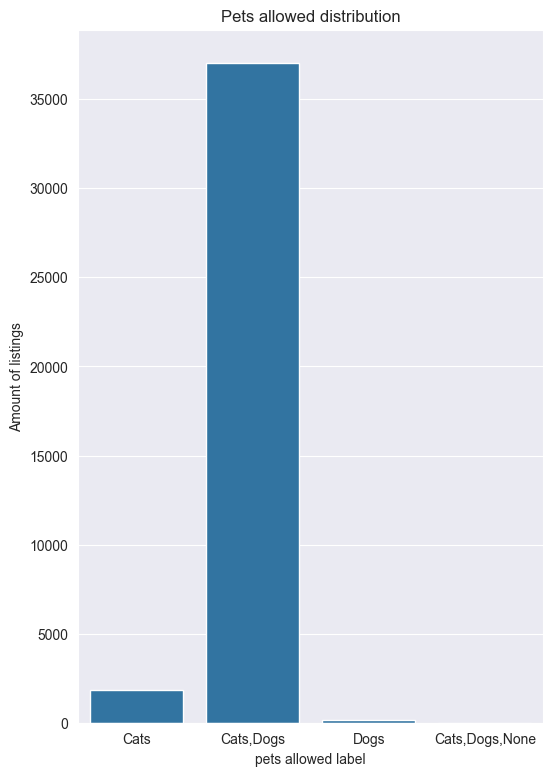

In [387]:
plt.figure(figsize=(6,9))
sns.countplot(data, x='pets_allowed')
plt.xlabel("pets allowed label")
plt.ylabel("Amount of listings")
plt.title("Pets allowed distribution")
plt.show()

In [388]:
print(f"procentage of pets not allowed {len(data.loc[data['pets_allowed'].isnull()])/(len(data))*100}")
print(f"procentage of Cats, Dogs {len(data.loc[data['pets_allowed']=='Cats,Dogs'])/(len(data))*100}")
print(f"procentage of Cats {len(data.loc[data['pets_allowed']=='Cats'])/(len(data))*100}")
print(f"procentage of Dogs {len(data.loc[data['pets_allowed']=='Dogs'])/(len(data))*100}")

procentage of pets not allowed 60.685999879083454
procentage of Cats, Dogs 37.33197638096774
procentage of Cats 1.8530460893573286
procentage of Dogs 0.12797001269623748


Baseret på overstående nøjes med at skelne mellem om husdyr er tilladt eller ej. For at gøre det lettere at arbejde med laver jeg værdierne om til 1 hvis værdien er enten 'Cats,Dogs', 'Cats' eller 'Dogs', og 0 hvis værdien er None eller null.

In [389]:
data.loc[data['pets_allowed'].isnull(), 'pets_allowed'] = 0
data.loc[data['pets_allowed'] != 0, 'pets_allowed'] = 1
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99242 entries, 0 to 99491
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bathrooms           99242 non-null  float64
 1   Cable or Satellite  99242 non-null  int64  
 2   Fireplace           99242 non-null  int64  
 3   Hot Tub             99242 non-null  int64  
 4   Wood Floors         99242 non-null  int64  
 5   Gated               99242 non-null  int64  
 6   Internet Access     99242 non-null  int64  
 7   Luxury              99242 non-null  int64  
 8   Gym                 99242 non-null  int64  
 9   Pool                99242 non-null  int64  
 10  Garbage Disposal    99242 non-null  int64  
 11  TV                  99242 non-null  int64  
 12  View                99242 non-null  int64  
 13  Doorman             99242 non-null  int64  
 14  Tennis              99242 non-null  int64  
 15  Washer Dryer        99242 non-null  int64  
 16  Basketbal

In [390]:
data['pets_allowed'] = data['pets_allowed'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99242 entries, 0 to 99491
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bathrooms           99242 non-null  float64
 1   Cable or Satellite  99242 non-null  int64  
 2   Fireplace           99242 non-null  int64  
 3   Hot Tub             99242 non-null  int64  
 4   Wood Floors         99242 non-null  int64  
 5   Gated               99242 non-null  int64  
 6   Internet Access     99242 non-null  int64  
 7   Luxury              99242 non-null  int64  
 8   Gym                 99242 non-null  int64  
 9   Pool                99242 non-null  int64  
 10  Garbage Disposal    99242 non-null  int64  
 11  TV                  99242 non-null  int64  
 12  View                99242 non-null  int64  
 13  Doorman             99242 non-null  int64  
 14  Tennis              99242 non-null  int64  
 15  Washer Dryer        99242 non-null  int64  
 16  Basketbal

### 'has_photo' value

In [391]:
data['has_photo'].unique()

array(['Thumbnail', 'No', 'Yes'], dtype=object)

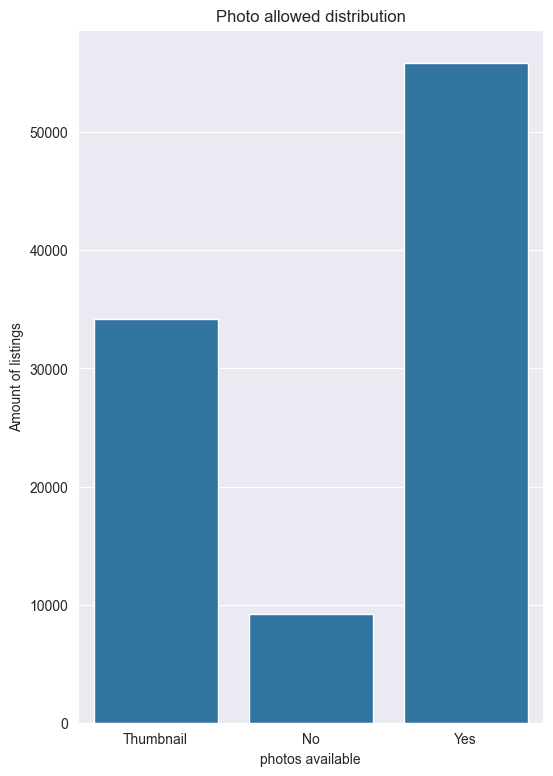

In [392]:
plt.figure(figsize=(6,9))
sns.countplot(data, x='has_photo')
plt.xlabel("photos available")
plt.ylabel("Amount of listings")
plt.title("Photo allowed distribution")
plt.show()

Disse værdier tildelse følgende værdier:
- 'No' = 0
- 'Thumbnail' = 1
- 'Yes' = 2

In [393]:
data['has_photo'] = data['has_photo'].apply(lambda x: 0 if x == 'No' else 1 if x == 'Thumbnail' else 2)
data

,bathrooms,Cable or Satellite,Fireplace,Hot Tub,Wood Floors,Gated,Internet Access,Luxury,Gym,Pool,...,Alarm,Playground,Parking,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,1,1,2195.0,542,Redondo Beach,CA
1,1.5,0,0,0,0,0,0,0,0,0,...,0,0,0,3.0,1,1,1250.0,1500,Newport News,VA
2,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,3.0,1,0,1395.0,1650,Raleigh,NC
3,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,2.0,1,1,1600.0,820,Vacaville,CA
4,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,1,1,975.0,624,Albuquerque,NM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,1.0,0,0,0,1,0,0,0,1,0,...,0,1,1,1.0,2,0,780.0,605,Houston,TX
99488,2.0,1,0,0,0,0,0,0,1,1,...,0,1,1,2.0,2,1,813.0,921,Jacksonville,FL
99489,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,2,1,1325.0,650,San Diego,CA
99490,1.0,0,0,0,0,0,0,0,1,1,...,0,0,0,1.0,2,1,931.0,701,Huntersville,NC


In [394]:
data['has_photo'].unique()

array([1, 0, 2])

### "cityname" value 

In [395]:
len(data['cityname'].unique())

2976

In [396]:
len(data.loc[data['cityname'].isnull()])

298

først vil jeg fjerne alle rækker, som ikke har et bynavn

In [397]:
data.loc[data['cityname'].isnull(), 'cityname'] = "No cityname"
data.drop(data[data['cityname'] == 'No cityname'].index, inplace=True)

Jeg vil erstatte alle byer der opstår 10 gange eller færre med other

In [398]:
cities_few_instances = data.groupby('cityname')['cityname'].agg('count').sort_values(ascending=False)
len(cities_few_instances[cities_few_instances<10])

1934

In [399]:
cities_few_instances=cities_few_instances[cities_few_instances<10]
data.cityname = data.cityname.apply(lambda x: 'Other' if x in cities_few_instances else x)

In [400]:
data.groupby('cityname')['cityname'].agg('count').sort_values(ascending=False)

cityname
Other          5574
Dallas         2854
Denver         2750
Los Angeles    2401
Las Vegas      1846
               ... 
Oldsmar          10
Oak Park         10
Provo            10
Calabasas        10
Bridgewater      10
Name: cityname, Length: 1042, dtype: int64

By navnet erstattes med gennemsnit prisen for den by, på den måde har byen stadig en indflydelse på prisen, uden at jeg skal tilføje tusindvis af kolonner til datasættet

In [401]:
# Calculate average price per city and map it back to the dataset
city_avg_price = data.groupby('cityname')['price'].mean()
data['city_avg_price'] = data['cityname'].map(city_avg_price)
data

,bathrooms,Cable or Satellite,Fireplace,Hot Tub,Wood Floors,Gated,Internet Access,Luxury,Gym,Pool,...,Playground,Parking,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state,city_avg_price
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,1.0,1,1,2195.0,542,Redondo Beach,CA,2790.870130
1,1.5,0,0,0,0,0,0,0,0,0,...,0,0,3.0,1,1,1250.0,1500,Newport News,VA,1077.572727
2,2.0,0,0,0,0,0,0,0,0,0,...,0,0,3.0,1,0,1395.0,1650,Raleigh,NC,1243.326012
3,1.0,0,0,0,0,0,0,0,0,0,...,0,0,2.0,1,1,1600.0,820,Vacaville,CA,1898.951220
4,1.0,0,0,0,0,0,0,0,0,0,...,0,0,1.0,1,1,975.0,624,Albuquerque,NM,975.923077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,1.0,0,0,0,1,0,0,0,1,0,...,1,1,1.0,2,0,780.0,605,Houston,TX,1091.017591
99488,2.0,1,0,0,0,0,0,0,1,1,...,1,1,2.0,2,1,813.0,921,Jacksonville,FL,1152.475884
99489,1.0,0,0,0,0,0,0,0,0,0,...,0,0,1.0,2,1,1325.0,650,San Diego,CA,2376.473618
99490,1.0,0,0,0,0,0,0,0,1,1,...,0,0,1.0,2,1,931.0,701,Huntersville,NC,1354.746667


Herefter kan *cityname* fjernes

In [402]:
city_avg_price_square_feet = data[['cityname', 'square_feet', 'price']]
city_avg_price_square_feet.loc[:, 'price_per_sqft'] = city_avg_price_square_feet['price'] / city_avg_price_square_feet['square_feet']
city_avg_price_square_feet = city_avg_price_square_feet.groupby('cityname')['price_per_sqft'].mean().reset_index()
city_avg_price_square_feet = city_avg_price_square_feet.sort_values(by='price_per_sqft', ascending=False).reset_index().drop(columns='index')
city_avg_price_square_feet. head(10)

C:\Users\mmsor\AppData\Local\Temp\ipykernel_35040\1844780912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_avg_price_square_feet.loc[:, 'price_per_sqft'] = city_avg_price_square_feet['price'] / city_avg_price_square_feet['square_feet']


,cityname,price_per_sqft
0,San Francisco,5.902450
1,New York,4.877180
2,Redwood City,4.856942
3,Culver City,4.806134
4,Palo Alto,4.684949
5,Santa Monica,4.607079
6,West Hollywood,4.607037
7,Cambridge,4.174835
8,Pacific Palisades,4.146193
9,Mountain View,3.971046


In [403]:
city_avg_price_square_feet.tail(10)

,cityname,price_per_sqft
1032,Montgomery,0.756999
1033,Leesville,0.752396
1034,Dacula,0.740519
1035,Topeka,0.735468
1036,Youngstown,0.733677
1037,Conway,0.711923
1038,Fort Smith,0.681246
1039,Rocky Mount,0.678037
1040,Gulfport,0.662208
1041,Jefferson City,0.609619


### "state" value

In [404]:
len(data.loc[data['state'].isnull()])

0

Til kolonnen 'state' bruger jeg samme metode som til cityname. jeg starter med at fjerne alle rækker der ikke har en værdi i kolonnen.

In [405]:
data.loc[data['state'].isnull(), 'state'] = "No state"
data.drop(data[data['state'] == 'No state'].index, inplace=True)

In [406]:
# Calculate average price per state and map it back to the dataset
city_avg_price = data.groupby('state')['price'].mean()
data['state_avg_price'] = data['state'].map(city_avg_price)
data

,bathrooms,Cable or Satellite,Fireplace,Hot Tub,Wood Floors,Gated,Internet Access,Luxury,Gym,Pool,...,Parking,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state,city_avg_price,state_avg_price
0,1.0,0,0,0,0,0,0,0,0,0,...,0,1.0,1,1,2195.0,542,Redondo Beach,CA,2790.870130,2465.646864
1,1.5,0,0,0,0,0,0,0,0,0,...,0,3.0,1,1,1250.0,1500,Newport News,VA,1077.572727,1485.990337
2,2.0,0,0,0,0,0,0,0,0,0,...,0,3.0,1,0,1395.0,1650,Raleigh,NC,1243.326012,1153.003970
3,1.0,0,0,0,0,0,0,0,0,0,...,0,2.0,1,1,1600.0,820,Vacaville,CA,1898.951220,2465.646864
4,1.0,0,0,0,0,0,0,0,0,0,...,0,1.0,1,1,975.0,624,Albuquerque,NM,975.923077,844.041667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,1.0,0,0,0,1,0,0,0,1,0,...,1,1.0,2,0,780.0,605,Houston,TX,1091.017591,1218.192362
99488,2.0,1,0,0,0,0,0,0,1,1,...,1,2.0,2,1,813.0,921,Jacksonville,FL,1152.475884,1574.700763
99489,1.0,0,0,0,0,0,0,0,0,0,...,0,1.0,2,1,1325.0,650,San Diego,CA,2376.473618,2465.646864
99490,1.0,0,0,0,0,0,0,0,1,1,...,0,1.0,2,1,931.0,701,Huntersville,NC,1354.746667,1153.003970


In [407]:
state_avg_price_square_feet = data[['state', 'square_feet', 'price']]
state_avg_price_square_feet.loc[:, 'price_per_sqft'] = state_avg_price_square_feet['price'] / state_avg_price_square_feet['square_feet']
state_avg_price_square_feet = state_avg_price_square_feet.groupby('state')['price_per_sqft'].mean().reset_index()
state_avg_price_square_feet = state_avg_price_square_feet.sort_values(by='price_per_sqft', ascending=False).reset_index().drop(columns='index')

state_avg_price_square_feet.head(10)

C:\Users\mmsor\AppData\Local\Temp\ipykernel_35040\4018738245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_avg_price_square_feet.loc[:, 'price_per_sqft'] = state_avg_price_square_feet['price'] / state_avg_price_square_feet['square_feet']


,state,price_per_sqft
0,DC,3.373305
1,NY,2.991710
2,CA,2.795405
3,HI,2.636039
4,RI,2.414641
5,MA,2.322498
6,NJ,2.261388
7,WA,2.091487
8,OR,1.874634
9,IL,1.811956


In [408]:
state_avg_price_square_feet.tail(10)

,state,price_per_sqft
41,KY,1.080460
42,NE,1.058432
43,KS,0.994386
44,SD,0.970952
45,ND,0.966610
46,AL,0.965194
47,AR,0.930630
48,MS,0.886189
49,WY,0.846221
50,WV,0.787550


# Outlier Detection

## Outlier detection med box plot

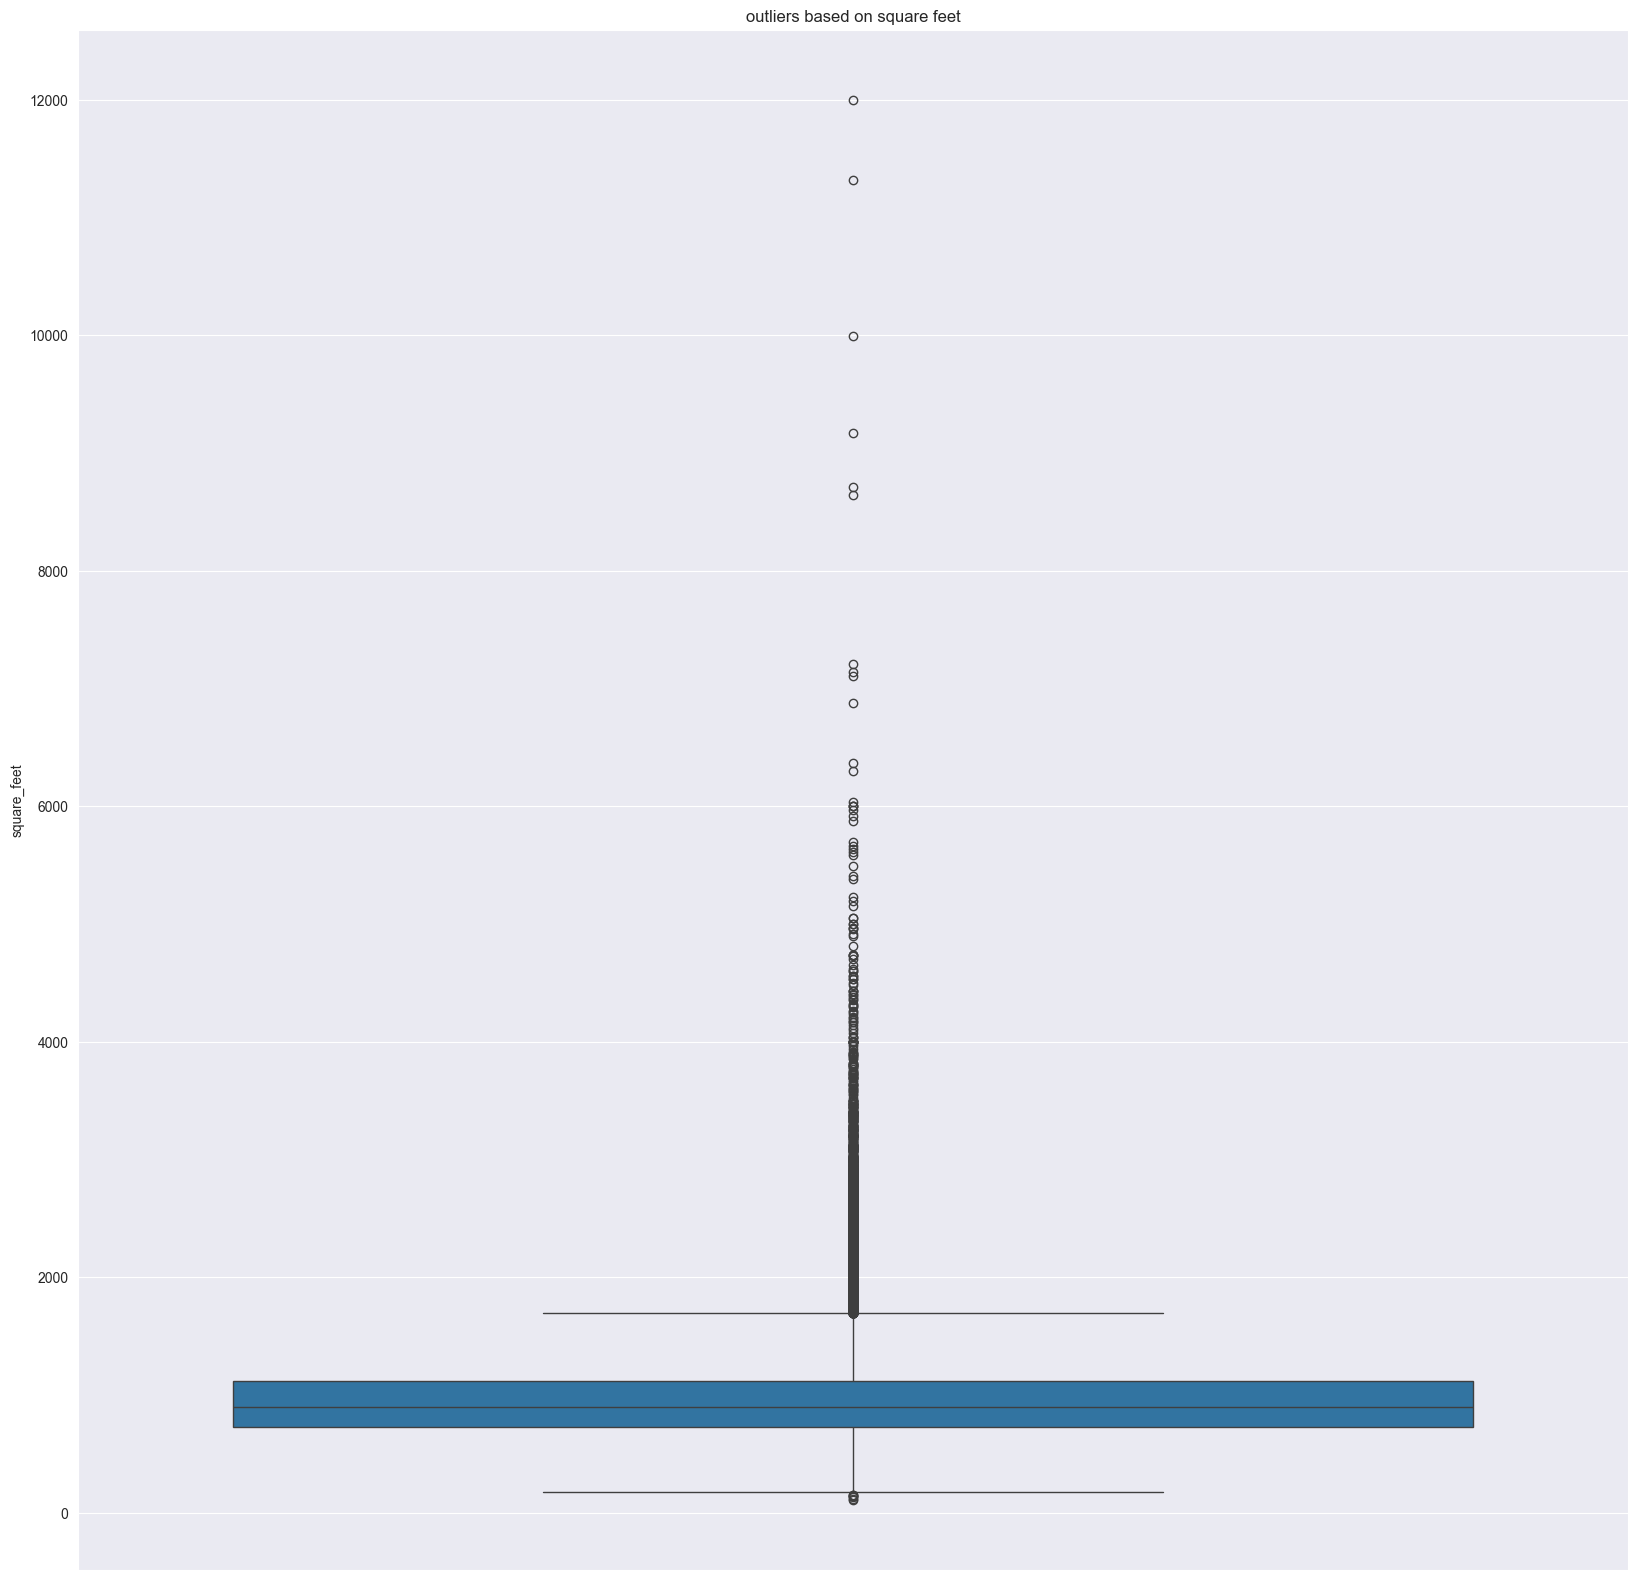

In [409]:
plt.figure(figsize=(20,20 ))
sns.boxplot(data['square_feet'])
plt.title("outliers based on square feet")
plt.show()

Outlier med IQR

In [410]:
Q1 = data['square_feet'].quantile(0.25)
Q3 = data['square_feet'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Number of outliers:
outliers = data[(data['square_feet'] < lower_bound) | (data['square_feet'] > upper_bound)]
print(f"Amount of outliers {outliers.shape[0]}")
print(f"Out of {data.shape[0]} datapoints")
print(f"upper bound: {upper_bound}, lower bound: {lower_bound}")

data_no_outliers = data[(data['square_feet'] >= lower_bound) & (data['square_feet'] <= upper_bound)]

Amount of outliers 2827
Out of 98944 datapoints
upper bound: 1692.5, lower bound: 152.5


# EDA
EDA Goals:
- Understand Price Distribution:
	- Analyze rental prices to see the typical range and identify high-end vs. affordable listings.
- Explore Size and Price Relationship:
	- Examine how square footage relates to price, which helps understand price per square foot.
- Location Analysis:
	- Check price trends by location or city to identify areas with higher rental costs.
- Amenity Impact:
	- Look at how features like balcony, parking, or pet-friendly affect rental prices.

In [411]:
data_no_string = data.drop(columns=['cityname','state'])

# Explore Size and Price Relationship
Som man kan se på Heatmap er *square_feet* det felt med størst indflydelse på prisen, med en positiv korrelation på 0.4

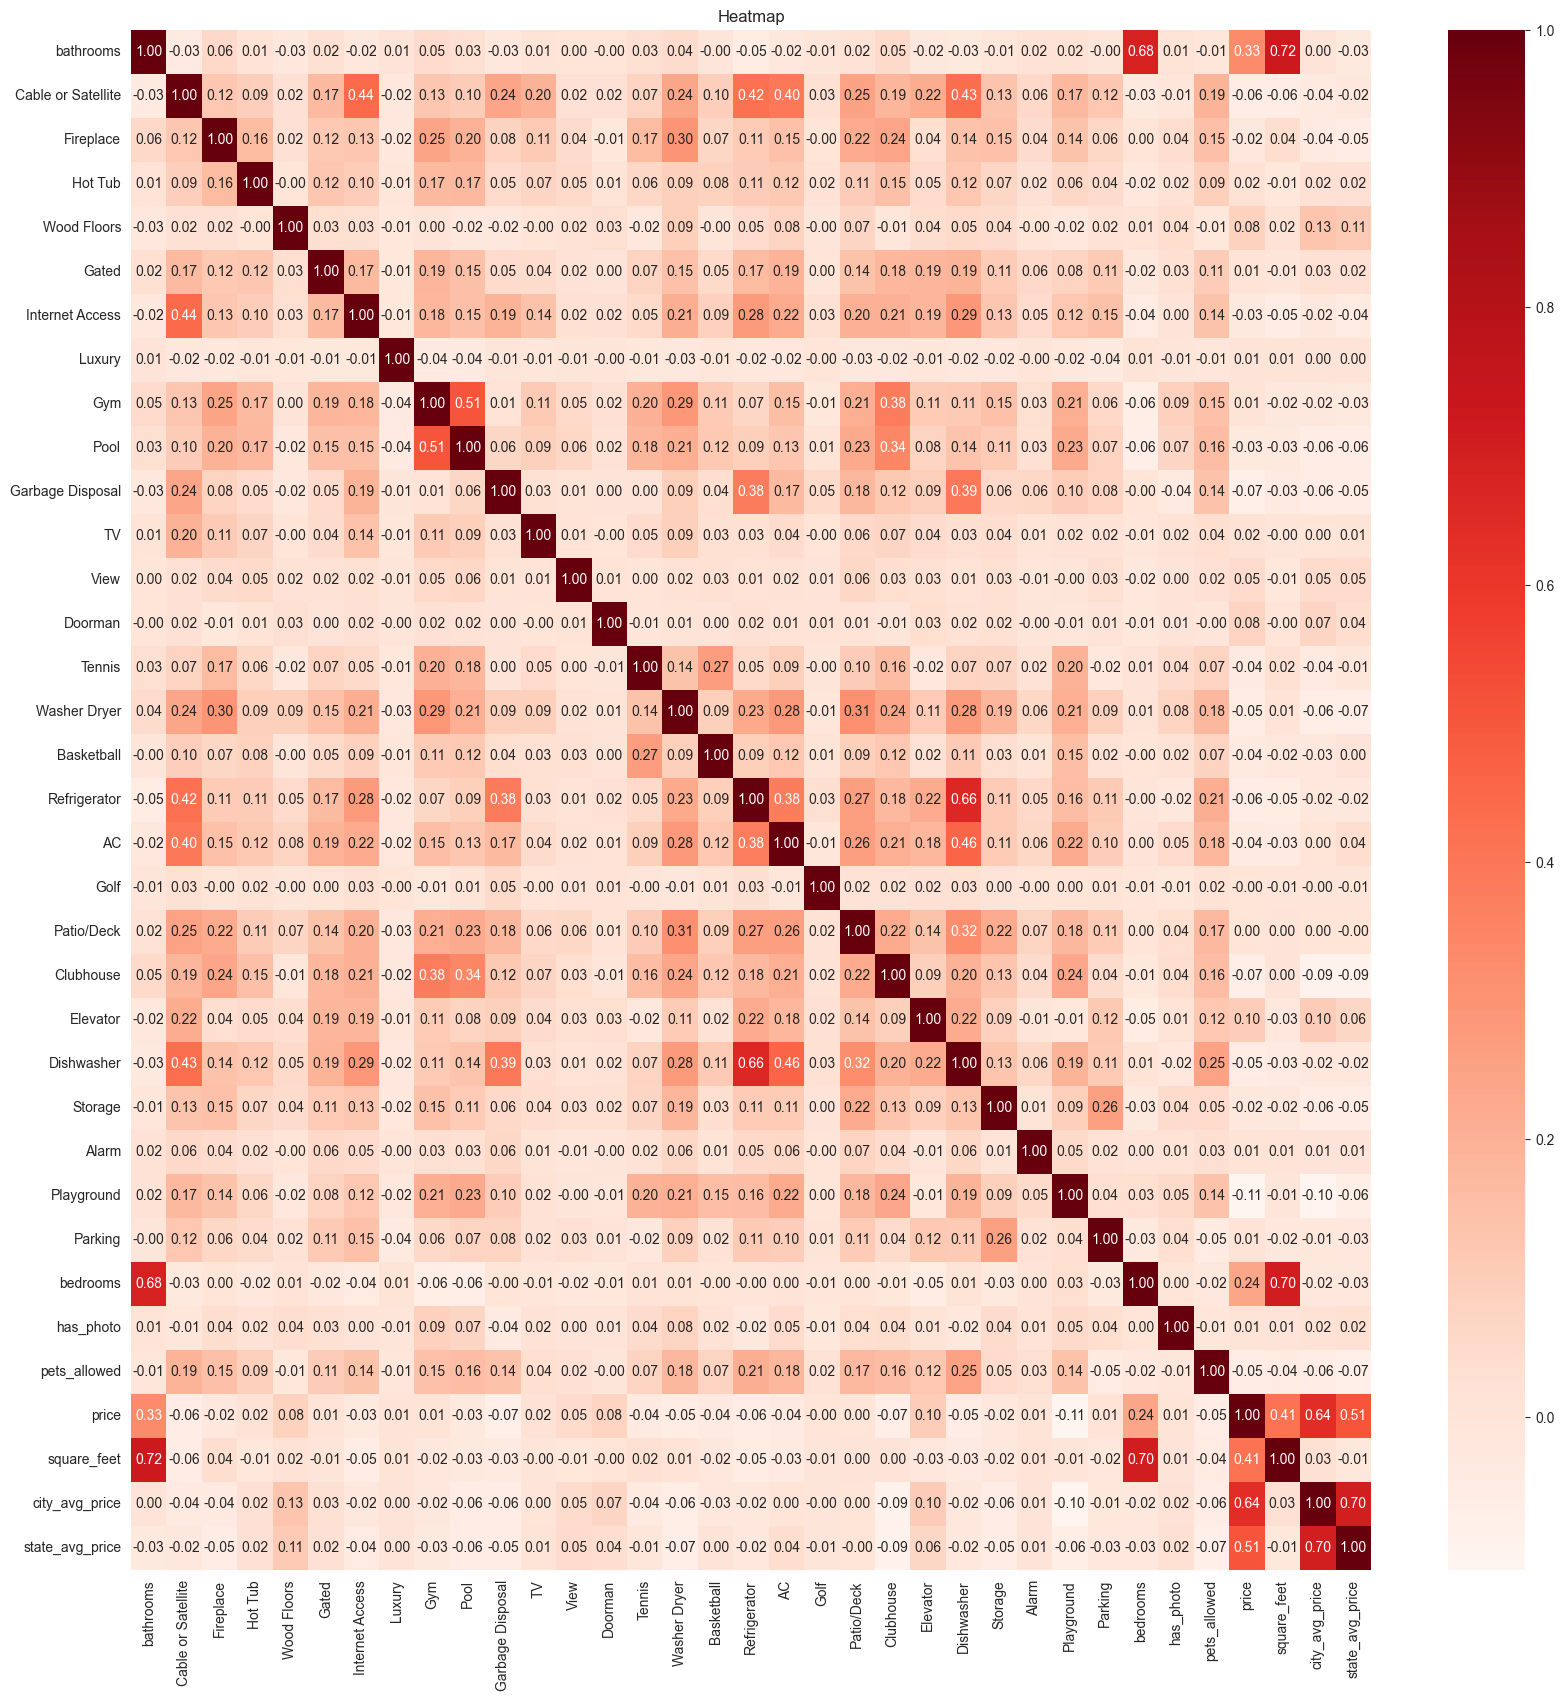

In [412]:
plt.figure(figsize=(20,20))
sns.heatmap(data_no_string.corr(),annot=True, cmap='Reds', fmt='.2f')
plt.title("Heatmap")
plt.show()

Text(0.5, 1.0, 'Square Feet to Price Ratio before outlier removal')

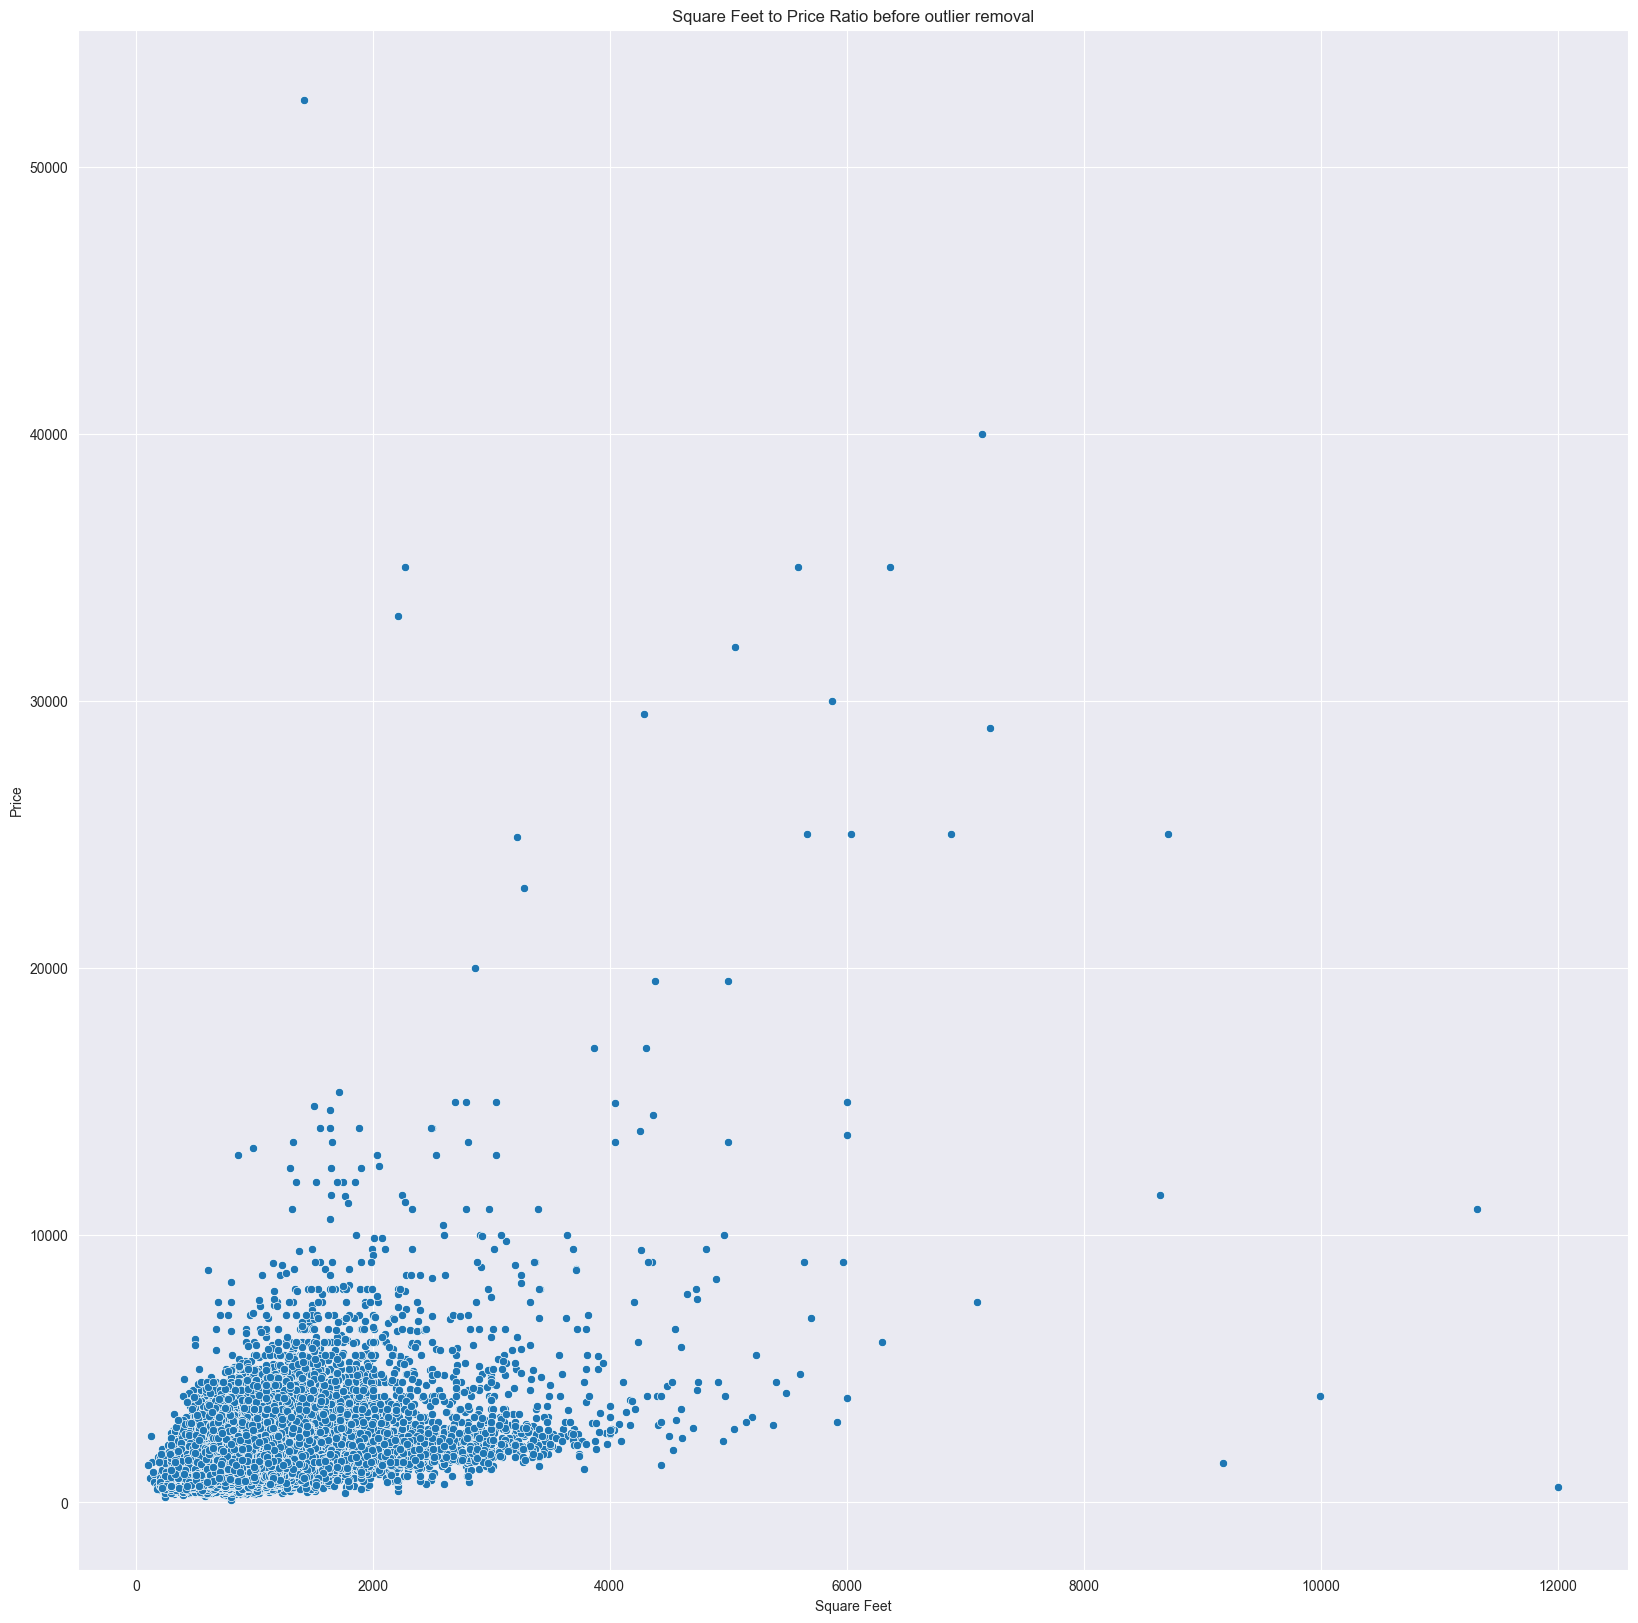

In [413]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=data, x="square_feet", y="price")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("Square Feet to Price Ratio before outlier removal")

Text(0.5, 1.0, 'Square Feet to Price Ratio after outlier removal')

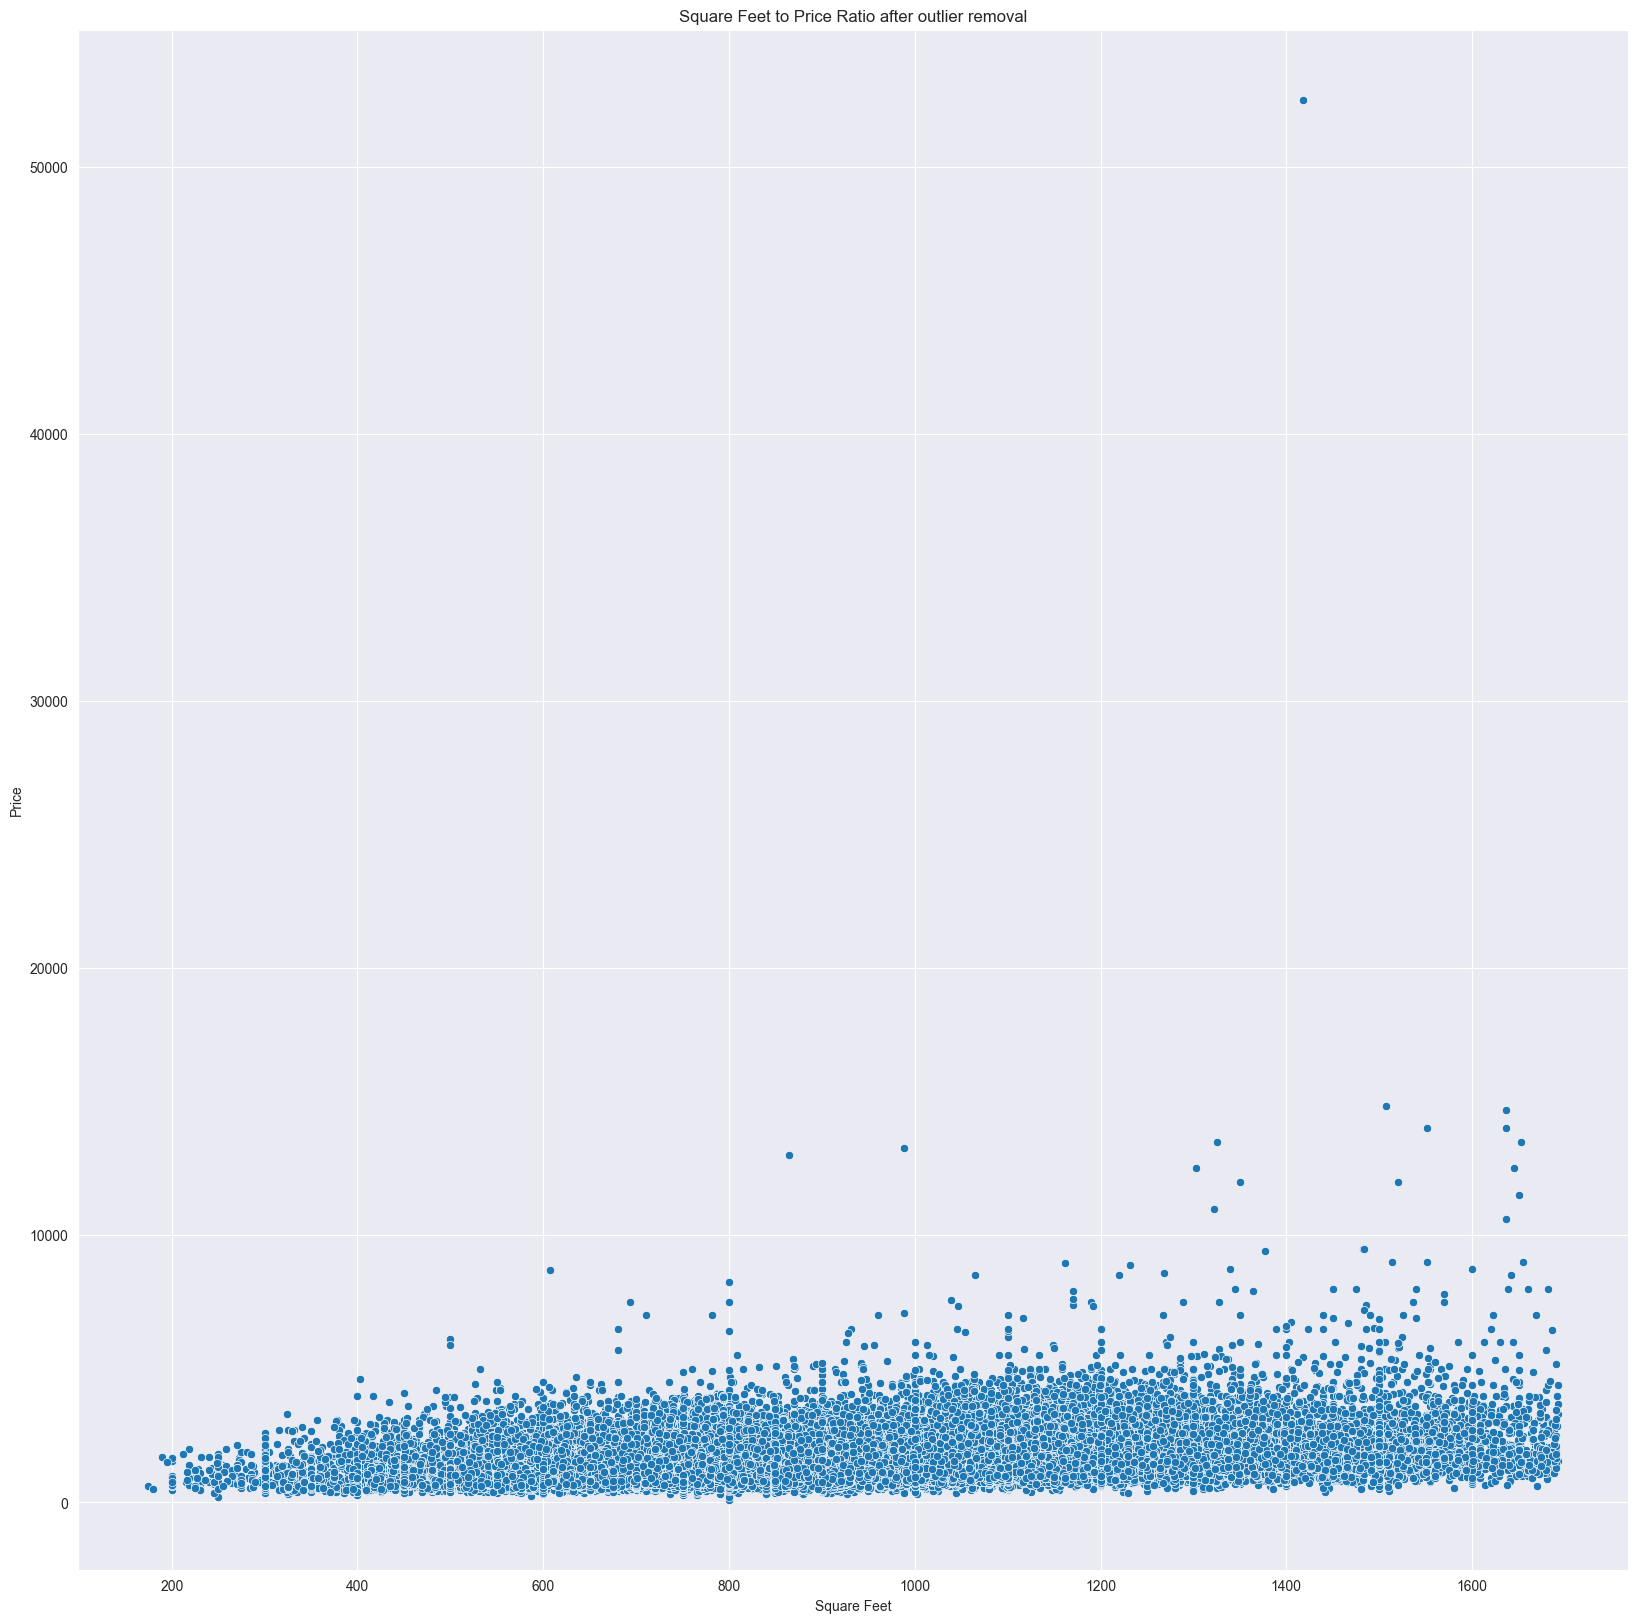

In [414]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=data_no_outliers, x="square_feet", y="price")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("Square Feet to Price Ratio after outlier removal")

### Removing the outliers

In [415]:
data = data_no_outliers

- Amenity Impact:
	- Look at how features like balcony, parking, or pet-friendly affect rental prices.

Som man kan se på Heatmap er der så godt som ingen sammenhæng mellem de forskellige amenities og prisen, dem der er tættest på er Elevator om en positiv korrelation på 0.1 og Doorman og Wood Floors med en positiv korrelation på 0.08

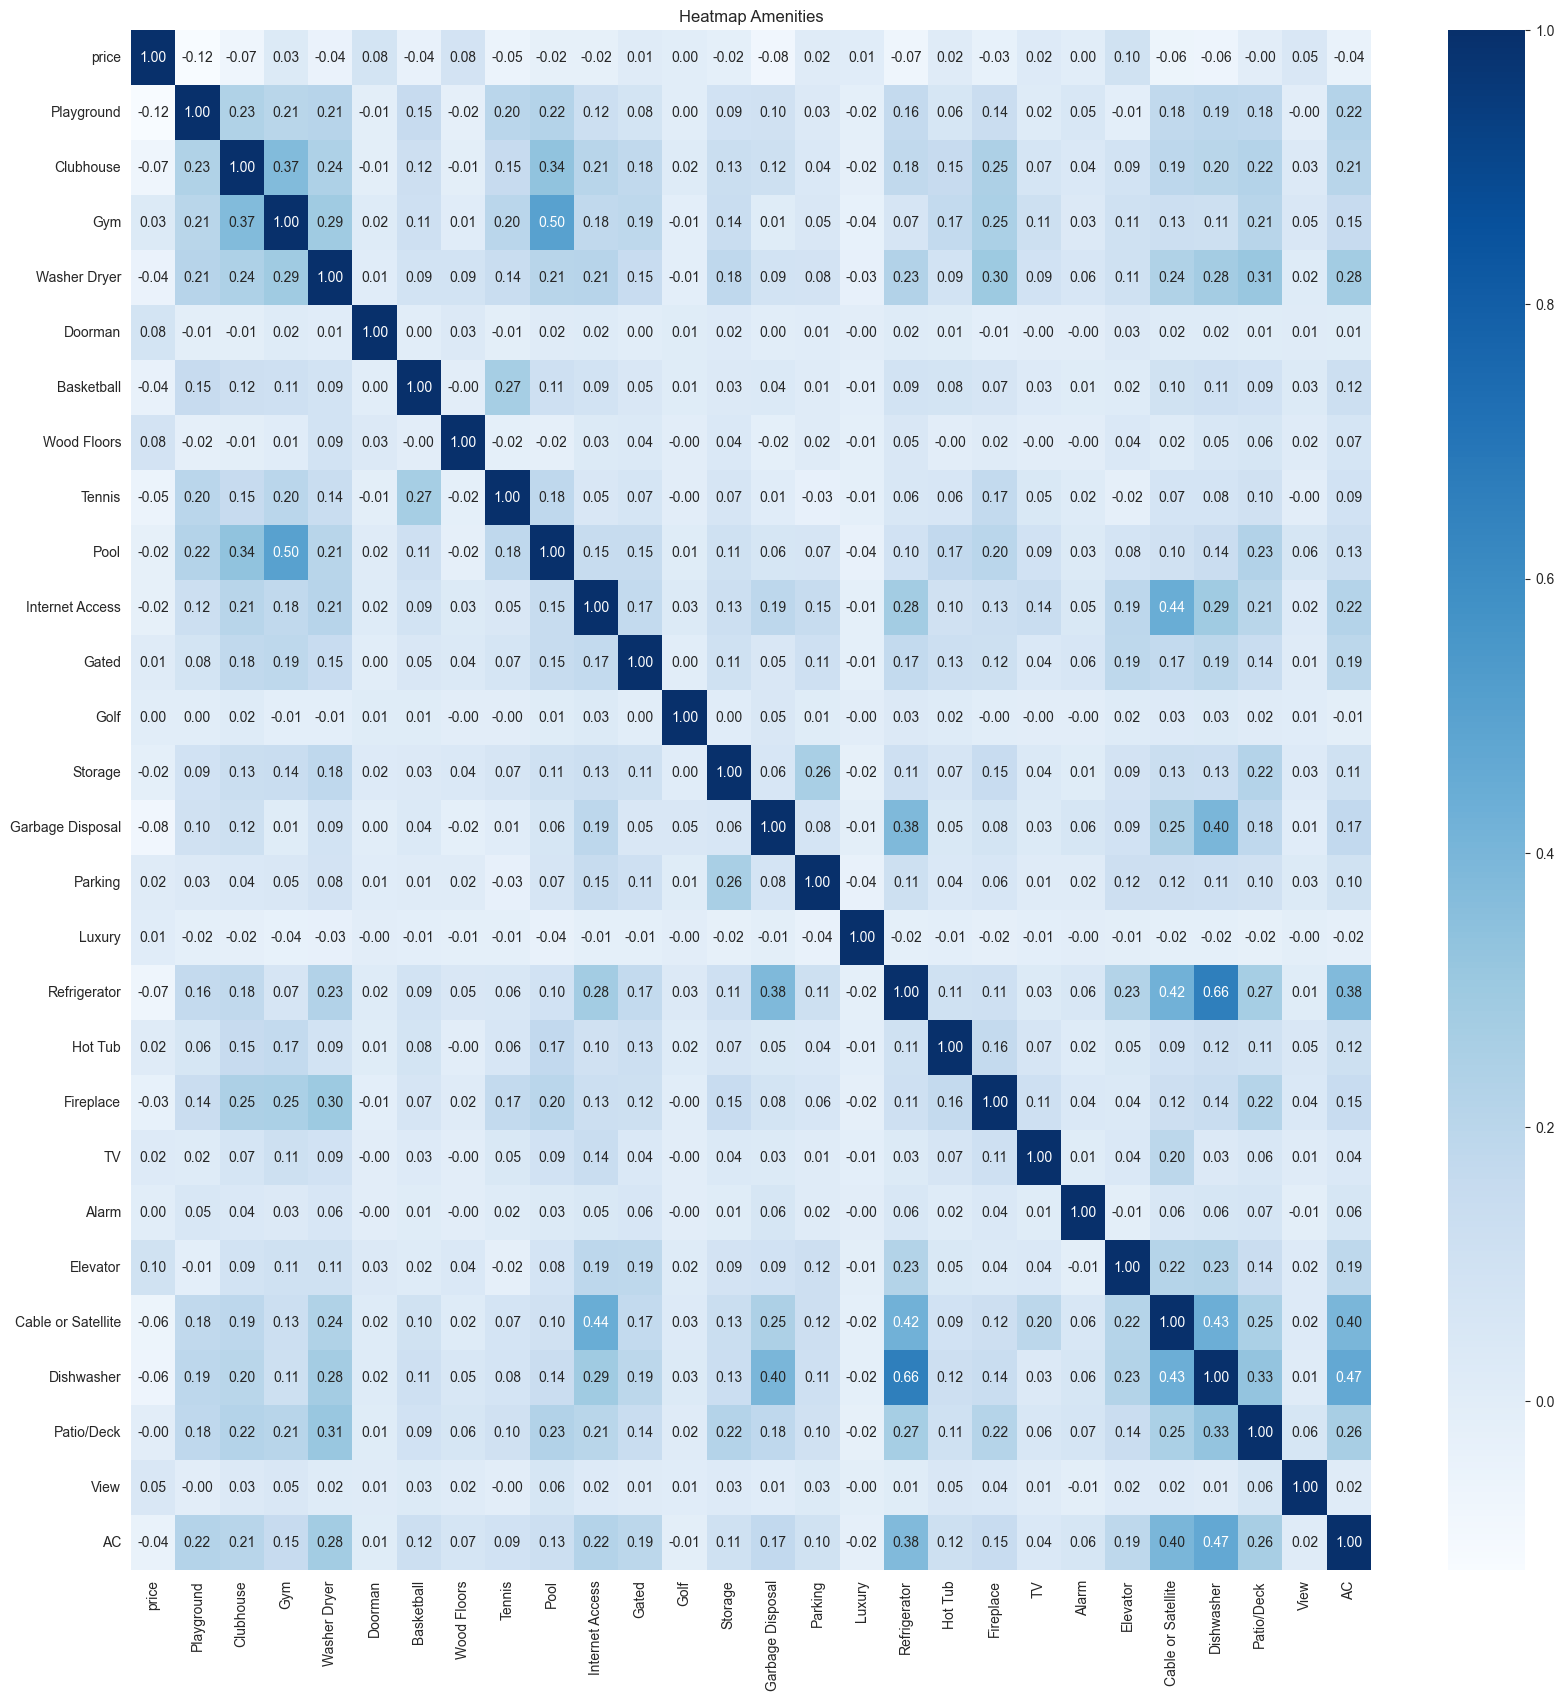

In [416]:
Amenities_Price_corr = data[['price','Playground', 'Clubhouse', 'Gym', 'Washer Dryer', 'Doorman',
       'Basketball', 'Wood Floors', 'Tennis', 'Pool', 'Internet Access',
       'Gated', 'Golf', 'Storage', 'Garbage Disposal', 'Parking', 'Luxury',
       'Refrigerator', 'Hot Tub', 'Fireplace', 'TV', 'Alarm', 'Elevator',
       'Cable or Satellite', 'Dishwasher', 'Patio/Deck', 'View', 'AC']].corr()
plt.figure(figsize=(20,20))
sns.heatmap(Amenities_Price_corr,annot=True, cmap='Blues', fmt='.2f')
plt.title("Heatmap Amenities")
plt.show()

# ML Goals
- Predict Rental Price:
	- Build a regression model to predict price based on features like location, size, and amenities.
- Classify Apartments by Price Range:
	- Use classification to group apartments into price tiers (e.g., budget, mid-range, luxury).
- Identify Key Price Drivers:
	- Use feature importance to find the most influential factors affecting rental prices.



 # Predict Rental Price:
	- Build a regression model to predict price based on features like location, size, and amenities.

In [417]:
X = data_no_string.drop(columns=['price'])
y = data_no_string['price']

In [418]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98944 entries, 0 to 99491
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bathrooms           98944 non-null  float64
 1   Cable or Satellite  98944 non-null  int64  
 2   Fireplace           98944 non-null  int64  
 3   Hot Tub             98944 non-null  int64  
 4   Wood Floors         98944 non-null  int64  
 5   Gated               98944 non-null  int64  
 6   Internet Access     98944 non-null  int64  
 7   Luxury              98944 non-null  int64  
 8   Gym                 98944 non-null  int64  
 9   Pool                98944 non-null  int64  
 10  Garbage Disposal    98944 non-null  int64  
 11  TV                  98944 non-null  int64  
 12  View                98944 non-null  int64  
 13  Doorman             98944 non-null  int64  
 14  Tennis              98944 non-null  int64  
 15  Washer Dryer        98944 non-null  int64  
 16  Basketbal

### Linear Regression

In [419]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=12, test_size=0.2)

In [420]:
X_train

,bathrooms,Cable or Satellite,Fireplace,Hot Tub,Wood Floors,Gated,Internet Access,Luxury,Gym,Pool,...,Storage,Alarm,Playground,Parking,bedrooms,has_photo,pets_allowed,square_feet,city_avg_price,state_avg_price
97720,1.5,0,1,0,1,0,0,0,0,0,...,0,0,0,0,3.0,2,0,1228,1110.700000,1198.060649
22448,2.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,2.0,2,1,1300,2666.037313,1644.813145
65395,2.0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,2.0,0,0,1094,1781.623632,1485.990337
26222,1.0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1.0,2,0,680,1204.832669,1351.633474
63790,1.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.0,0,1,1150,1077.572727,1485.990337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75402,2.0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,3.0,1,0,1372,888.194539,1120.110737
36637,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1.0,2,0,784,1189.562657,1110.922481
40339,2.0,1,0,0,1,1,1,0,1,1,...,1,0,0,1,2.0,2,1,1096,1337.044849,1218.192362
19842,1.0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1.0,1,0,659,2032.253333,2192.835058


In [421]:
X_test

,bathrooms,Cable or Satellite,Fireplace,Hot Tub,Wood Floors,Gated,Internet Access,Luxury,Gym,Pool,...,Storage,Alarm,Playground,Parking,bedrooms,has_photo,pets_allowed,square_feet,city_avg_price,state_avg_price
31500,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1.0,2,1,842,1827.250000,1644.813145
70205,1.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0.0,1,1,400,2999.112453,2465.646864
95558,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1.0,2,0,375,1687.072785,1485.228682
82112,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2.0,2,0,1111,2376.473618,2465.646864
54262,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.0,1,1,810,1267.366667,2465.646864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10799,2.0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,2.0,2,0,1116,1380.815287,1153.003970
42765,2.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,4.0,2,0,1607,2282.291667,2192.835058
21386,2.5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2.0,1,0,1251,1133.026002,1173.551920
86276,1.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,2.0,2,0,1000,2920.430000,2531.576271


In [422]:
# Train Linear Regression 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# Evaluate linear Regression
print('R2 Score')
print(r2_score(y_test,y_pred))

R2 Score
0.5343160121518089


In [423]:
results_df = pd.DataFrame({
    'Actual Value':y_test,
    'Predicted Value': y_pred
})
print(results_df)

       Actual Value  Predicted Value
31500        1574.0      1701.797721
70205        1295.0      2533.477550
95558        1125.0      1107.012849
82112        3570.0      2728.899421
54262        1266.0      1288.964486
...             ...              ...
10799        1805.0      1751.847112
42765        4900.0      2743.907047
21386        1449.0      1523.027197
86276        2400.0      2924.508575
21929        1421.0      1304.080694

[19789 rows x 2 columns]


In [424]:
# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2 * 100:.2f}%")

Mean Absolute Error: 298.9070231686326
Mean Squared Error: 451510.67394374654
Root Mean Squared Error: 671.9454397075306
R² Score: 53.43%


Jeg vil forsøge at begrænse dimensionalitet af dataen, ved kun at fokuserer på de 10 vigtigste features.
Da jeg forsøger med LinearRegression modellen kan jeg ikke her benytte feature_importances_, istedet kan jeg benytte coef_ for at bestemme attributternes vigtighed, for at gøre dette skal jeg bruge Standardization

In [425]:
scaler = StandardScaler()
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=12, test_size=0.2)
X = data_no_string.drop(columns=['price'])
y = data_no_string['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=12, test_size=0.2)

# Scaling the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fitting the model and extractiong data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Identify top 10 features
coefficients = model.coef_
feature_names = X_train.columns

top_10_indices = np.argsort(np.abs(coefficients))[-10:][::-1]
top_10_features = feature_names[top_10_indices]

# Get top feastures from original data
X_train_top_10 = X_train_scaled[:, top_10_indices]
X_test_top_10 = X_test_scaled[:, top_10_indices]

# Train new model with only top 10 features 
model_top_10 = LinearRegression()
model_top_10.fit(X_train_top_10, y_train)

# Predictions made by new model
predictions_top_10 = model_top_10.predict(X_test_top_10)


In [426]:
top_10_features

Index(['city_avg_price', 'square_feet', 'state_avg_price', 'bathrooms',
       'bedrooms', 'Elevator', 'Playground', 'Doorman', 'AC', 'Gym'],
      dtype='object')

In [427]:
# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(y_test, predictions_top_10)
mse = mean_squared_error(y_test, predictions_top_10)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions_top_10)

# Print the results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2 * 100:.2f}%")

Mean Absolute Error: 301.34348271281345
Mean Squared Error: 454360.22886862454
Root Mean Squared Error: 674.0624814278158
R² Score: 53.14%


In [428]:
# Evaluate R² on the training set
r2_train = model_top_10.score(X_train_top_10, y_train)
print("R² on training set:", r2_train)

# Evaluate R² on the test set
r2_test = model_top_10.score(X_test_top_10, y_test)
print("R² on test set:", r2_test)

R² on training set: 0.6068292524620015
R² on test set: 0.5313770072121937


In [429]:
data_comparison = {'Actual values': y_test,
                   'predictions': predictions_top_10}
compare_df = pd.DataFrame(data_comparison)
compare_df

,Actual values,predictions
31500,1574.0,1674.177158
70205,1295.0,2554.762065
95558,1125.0,1096.073889
82112,3570.0,2716.099856
54262,1266.0,1364.649416
...,...,...
10799,1805.0,1733.357785
42765,4900.0,2791.557452
21386,1449.0,1480.690491
86276,2400.0,2952.630636


### RandomForestRegressor

In [430]:
X = data_no_string.drop(columns=['price'])
y = data_no_string['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
model = RandomForestRegressor(n_estimators=500)

model.fit(X_train, y_train)

rf_pred = model.predict(X_test)

In [432]:
# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rf_pred)

# Print the results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2 * 100:.2f}%")

Mean Absolute Error: 181.24437509043466
Mean Squared Error: 189916.454679863
Root Mean Squared Error: 435.7940507623561
R² Score: 77.78%


#### RandomForrestRegressor Big 

In [433]:
X = data_no_string.drop(columns=['price'])
y = data_no_string['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [434]:
model = RandomForestRegressor(n_estimators=2000)

model.fit(X_train, y_train)

rf_pred = model.predict(X_test)

In [435]:
# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rf_pred)

# Print the results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2 * 100:.2f}%")

Mean Absolute Error: 176.36884171125206
Mean Squared Error: 145880.63925954458
Root Mean Squared Error: 381.94324088736613
R² Score: 77.82%


#### RandomForrestRegressor top top 10

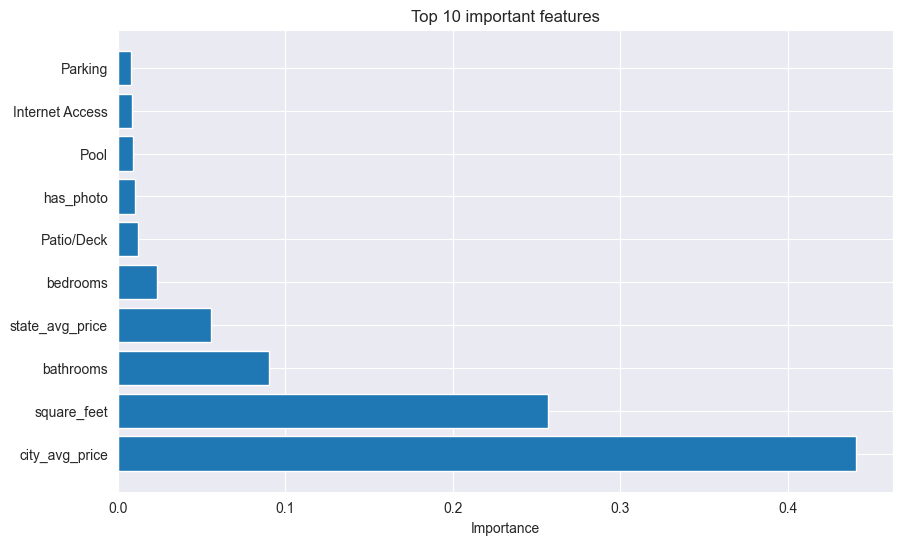

In [436]:
importances = model.feature_importances_
indices = np.argsort(importances)[-10:][::-1]

top_10_features = X_train.columns[indices]
top_importances = importances[indices]

plt.figure(figsize=(10,6))
plt.barh(top_10_features, top_importances)
plt.xlabel("Importance")
plt.title("Top 10 important features")
plt.show()


In [437]:
X_train_top_10 = X_train[top_10_features]
X_test_top_10 = X_test[top_10_features]

X_test_top_10

,city_avg_price,square_feet,bathrooms,state_avg_price,bedrooms,Patio/Deck,has_photo,Pool,Internet Access,Parking
48924,2178.111111,1200,1.0,2192.835058,3.0,0,2,0,0,0
51108,1133.026002,1050,2.0,1173.551920,3.0,0,1,1,0,0
58302,1329.117871,717,1.0,1574.700763,1.0,0,1,0,0,0
20209,2999.112453,583,1.0,2465.646864,2.0,0,1,0,0,0
81019,1101.416667,1173,2.0,1153.003970,3.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
95147,1417.040725,1165,2.0,1574.700763,2.0,0,2,0,0,1
58331,1600.339309,1161,2.0,1351.633474,2.0,0,1,1,1,1
56476,1781.623632,738,1.0,1485.990337,1.0,1,1,0,0,0
67608,1311.320175,703,1.0,1485.990337,1.0,0,1,0,0,0


In [438]:
model.fit(X_train_top_10, y_train)

predictions_top_10 = model.predict(X_test_top_10)

In [439]:
# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(y_test, predictions_top_10)
mse = mean_squared_error(y_test, predictions_top_10)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions_top_10)

# Print the results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2 * 100:.2f}%")

Mean Absolute Error: 188.0248045378672
Mean Squared Error: 156705.05158359586
Root Mean Squared Error: 395.85988882885806
R² Score: 76.17%


# Classify Apartments by Price Range:
- Low: 0 to 33rd percentile
- Medium: 34th to 66th percentile
- High: 67th percentile and above



In [440]:
# Create price range as categories
data_no_string['price_category'] = pd.qcut(data_no_string['price'], q=3, labels=['Low', 'Medium', 'High'])

X_classification = data_no_string.drop(columns=['price', 'price_category'])
y_classification = data_no_string['price_category']

In [441]:
X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.2, random_state=12)

classifier = RandomForestClassifier(n_estimators=500, random_state=12)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

        High       0.88      0.88      0.88      6556
         Low       0.87      0.88      0.87      6662
      Medium       0.78      0.77      0.77      6571

    accuracy                           0.84     19789
   macro avg       0.84      0.84      0.84     19789
weighted avg       0.84      0.84      0.84     19789

Accuracy: 0.8414270554348375


In [442]:
# Feature importance
feature_importances = pd.Series(classifier.feature_importances_, index=X_classification.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)
print("Top Features:\n", top_features)

Top Features:
 city_avg_price     0.291110
square_feet        0.201986
state_avg_price    0.177691
bathrooms          0.037768
bedrooms           0.030888
has_photo          0.027830
pets_allowed       0.018451
Parking            0.016111
Pool               0.015146
Storage            0.014770
dtype: float64
